In [1]:
from tensorly.metrics.regression import RMSE
import time
import scipy.io
import tensorly as tl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorly.cp_tensor import CPTensor
from nn_hals_parafac_normalization_comparison import *
np.set_printoptions(precision=3)

#parameters
init='svd'
svd='numpy_svd'
rank=5

#hyperspectral image
mat = scipy.io.loadmat('/home/ctuna/tensoptly/benchmark_data/Hyperspectral/Indian_pines_corrected.mat')
image=mat['indian_pines_corrected']

tensor=tl.tensor(image,dtype='float')
normalization_functions=[nn_hals_normalize1, nn_hals_normalize2, 
                         nn_hals_normalize3, 
                         nn_hals_normalize4]
time_cp = tl.zeros([4, 5])
errors1 = []
weights1 = []
errors2 = []
weights2 = []
rec_errors = tl.zeros([4, 5])

1. Normalization at each outer loop (PR)
2. Normalization at each inner loop iteration (last factor is normalized after error calculation)
3. Normalization at the very end
4. 2 and 3 together

In [2]:
for j in range(5):
  for i in range(4):
     tic = time.time()
     tensornorm, errorsnorm, weights_iter = normalization_functions[i](tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
     weightsnorm, factorsnorm = tensornorm
     cp_reconstructionnorm = tl.cp_to_tensor((weightsnorm, factorsnorm))
     time_cp[i, j] = time.time()-tic
     rec_errors[i, j] = RMSE(tensor,cp_reconstructionnorm)
     
     if j==4:
        weights1.append(weights_iter)
        errors1.append(errorsnorm)

# Error per iteration 

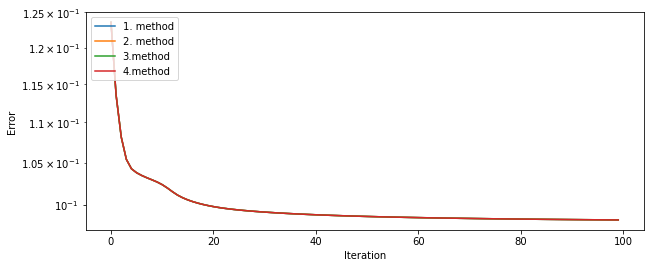

In [3]:
each_iteration(errors1[0], errors1[1], errors1[2], errors1[3])

# Plotting weights per iteration for each method 

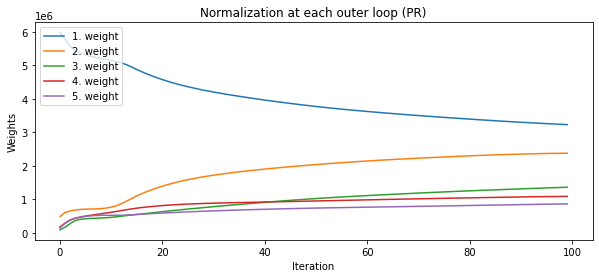

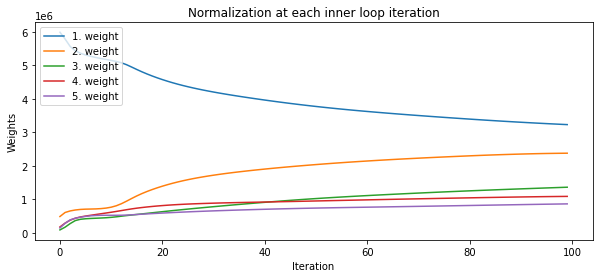

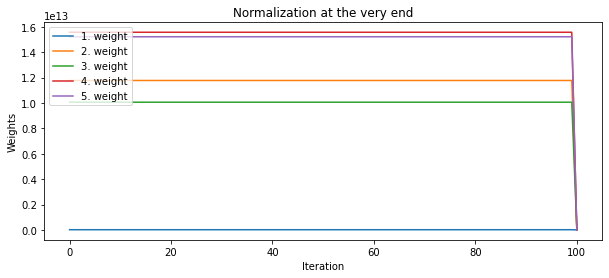

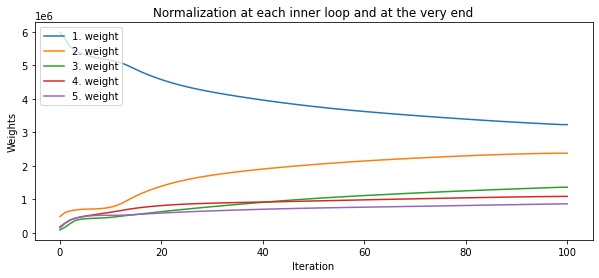

In [4]:
plot_weights(weights1[0], "Normalization at each outer loop (PR)")
plot_weights(weights1[1], "Normalization at each inner loop iteration")
plot_weights(weights1[2], "Normalization at the very end")
plot_weights(weights1[3], "Normalization at each inner loop and at the very end")

# Last weights

In [5]:
print("1. Method:"+ str(weights1[0][-1]))
print("2. Method:"+ str(weights1[1][-1]))
print("3. Method:"+ str(weights1[2][-1]))
print("4. Method:"+ str(weights1[3][-1]))

1. Method:[3228242.833 2374374.674 1358392.284 1084326.243  860675.967]
2. Method:[3228242.833 2374374.674 1358392.284 1084326.243  860675.967]
3. Method:[3228242.833 2374374.674 1358392.284 1084326.243  860675.967]
4. Method:[3228242.833 2374374.674 1358392.284 1084326.243  860675.967]


# Mean and standard deviation of reconstruction error

In [6]:
print("1. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[0, :]))+ ' ' + str("%.3f" % np.std(rec_errors[0, :])))
print("2. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[1, :]))+ ' ' + str("%.3f" % np.std(rec_errors[1, :])))                     
print("3. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[2, :]))+ ' ' + str("%.3f" % np.std(rec_errors[2, :])))                     
print("4. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[3, :]))+ ' ' + str("%.3f" % np.std(rec_errors[3, :]))) 

1. Method: 303.881 0.000
2. Method: 303.881 0.000
3. Method: 303.881 0.000
4. Method: 303.881 0.000


# Mean and standard deviation of processing time

In [7]:
print("1. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[0, :]))+ ' ' + str("%.3f" % np.std(time_cp[0, :])))
print("2. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[1, :]))+ ' ' + str("%.3f" % np.std(time_cp[1, :])))                     
print("3. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[2, :]))+ ' ' + str("%.3f" % np.std(time_cp[2, :])))                     
print("4. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[3, :]))+ ' ' + str("%.3f" % np.std(time_cp[3, :])))  

1. Method: 28.373 0.543
2. Method: 28.099 0.791
3. Method: 27.492 0.724
4. Method: 28.059 1.144
